## CMPINF 2100 Week 10 | Review: Generate Linear Model Data

We will review import assumptions of linear models by generating data from a linear model

We will use a SINGLE input that is LINEARLY related to the MEAN output or TREND

### Import Modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Define the relationship

We will use a SINGLE continuous INPUT that is LINEARLY relateed to the TREND

$$\mu = \beta_0 + \beta_1 \times x $$

To generate the data, we need to specify the TRUE INTERCEPT and the TRUE SLOPE. We must then calculate teh TREND or AVERAGE OUTPUT for a GIVEN INPUT value. Then we willl randomly generate OUTPUT observations around the TREND using a Gaussian random number generator. 

### Visualize Behavior

We must calculate the TREND and so we must SPECIFY the TRUE coefficient values.

In [2]:
my_intercept = 0.25 ### beta_0
my_slope = -1.5 ### beta_1

Create a data set of INPUT values to support VISUALIZING behavior.

In [3]:
df_viz = pd.DataFrame({'x': np.linspace(-3.5, 3.5, num=101)})

In [5]:
df_viz.head()

,x
0,-3.50
1,-3.43
2,-3.36
3,-3.29
4,-3.22


Calculate the TREND or AVERAGE OUTPUT **GIVEN** the INPUT!

In [6]:
df_viz['trend'] = my_intercept + my_slope * df_viz.x

In [7]:
df_viz

,x,trend
0,-3.50,5.500
1,-3.43,5.395
2,-3.36,5.290
3,-3.29,5.185
4,-3.22,5.080
...,...,...
96,3.22,-4.580
97,3.29,-4.685
98,3.36,-4.790
99,3.43,-4.895


Let's visualize the TREND with respect to the INPUT as a LINE CHART.

In [8]:
sns.set_style('whitegrid')

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


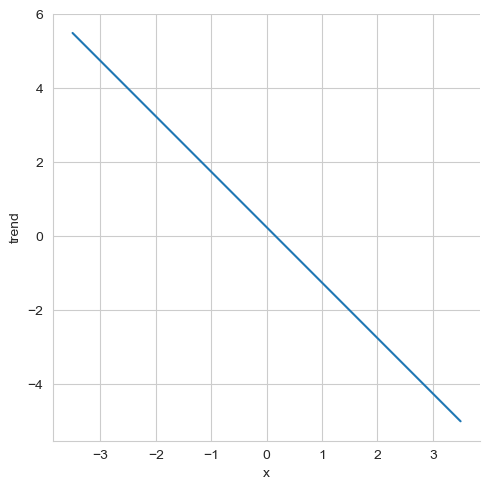

In [9]:
sns.relplot(data=df_viz, x='x', y='trend', kind='line')

But.. this week we will make more figures in matplotlib rather than SEABORN.

Text(0, 0.5, 'trend')

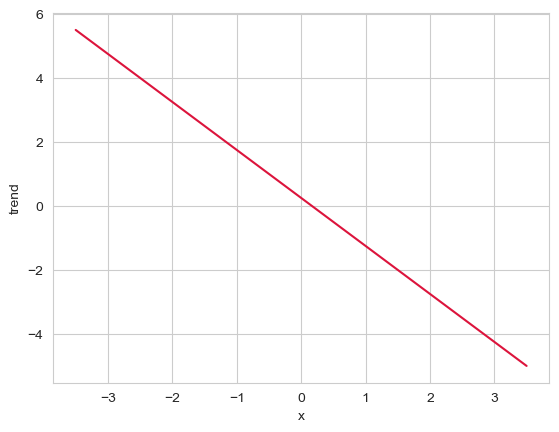

In [14]:
fig, ax = plt.subplots()

ax.plot(df_viz.x, df_viz.trend, color='crimson', linewidth=1.5 )

ax.set_xlabel('x')
ax.set_ylabel('trend')

We will now visualize the VARIATION around the TREND. Or, we will visualize the UNCERTAINTY of a single output measurement around the average output!

The LIKELIHOOD of an OUTPUT around the TREND is a GAUSSIAN distribution. The variation of a GAUSSIAN is specified by the STANDARD DEVIATION or SIGNMA.

We need to specify the SIGMA that controls the level of variation around the trend. 

In [16]:
my_sigma = 1.25

Last week we RANDOMLY generated MANY replications of output around the trend to show the CONSTANT variation around the TREND!

This week, we will summarize that level of variation using **RIBBONS**.

RIBBONS are deffined by LOWER or UPPER BOUNDS that correspond to LOWER and UPPER BOUNDS of INTERVALS.

Because the linear model has a GAUSSIAN likelihood or distribution, the UNCERTAINTY can be summarized as the number of standard deviations around the mean!

We will use the $\pm1 \sigma$ and $\pm2 \sigma$ intervals around the mean. These correspond to the 68\% and 95\% uncertainty intervals.

In [26]:
df_viz['obs_lwr_68'] = df_viz.trend - my_sigma
df_viz['obs_upr_68'] = df_viz.trend + my_sigma

In [27]:
df_viz['obs_lwr_95'] = df_viz.trend - 2 * my_sigma
df_viz['obs_upr_95'] = df_viz.trend + 2 * my_sigma

In [28]:
df_viz

,x,trend,obs_lwr_68,ops_upr_68,obs_lwr_95,obs_upr_95,obs_upr_68
0,-3.50,5.500,4.250,6.750,3.000,8.000,6.750
1,-3.43,5.395,4.145,6.645,2.895,7.895,6.645
2,-3.36,5.290,4.040,6.540,2.790,7.790,6.540
3,-3.29,5.185,3.935,6.435,2.685,7.685,6.435
4,-3.22,5.080,3.830,6.330,2.580,7.580,6.330
...,...,...,...,...,...,...,...
96,3.22,-4.580,-5.830,-3.330,-7.080,-2.080,-3.330
97,3.29,-4.685,-5.935,-3.435,-7.185,-2.185,-3.435
98,3.36,-4.790,-6.040,-3.540,-7.290,-2.290,-3.540
99,3.43,-4.895,-6.145,-3.645,-7.395,-2.395,-3.645


Visualize the UNCERTAINTY or LEVEL of VARIATION using RIBBONS.

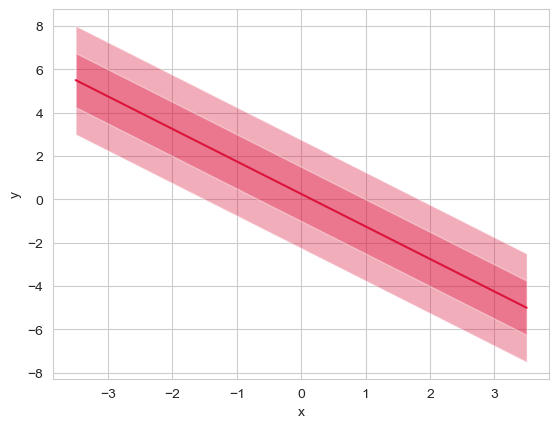

In [29]:
fig, ax = plt.subplots()

# true Trend
ax.plot( df_viz.x, df_viz.trend, color='crimson', linewidth=1.5 )
# TRUE variation around the TREND - showing 2 intervals
# 2 sigma interval
ax.fill_between( df_viz.x, df_viz.obs_lwr_95, df_viz.obs_upr_95, facecolor='crimson', alpha=0.35 )
# 1 sigma interval
ax.fill_between (df_viz.x, df_viz.obs_lwr_68, df_viz.obs_upr_68, facecolor='crimson', alpha=0.35)
# set labels
ax.set_xlabel('x')
ax.set_ylabel('y')
# show the plot
plt.show()

### Generate Random Output Data

Generate a small number of random output observations at specific input values.

For simplicity, let's treat the input as NOT random. The input will have values UNIFORMLY spaced between a lower bound and upper bound.

Specifically, let's use 9 input locations between -3 adn 3.

In [30]:
df = pd.DataFrame({'x': np.linspace(-3, 3, num=9)})

In [31]:
df

,x
0,-3.00
1,-2.25
2,-1.50
3,-0.75
4,0.00
5,0.75
6,1.50
7,2.25
8,3.00


Next, we need to calulate the MEAN OUTPUT or TREND **GIVEN** the input values!

In [32]:
df['trend'] = my_intercept + my_slope * df.x

In [33]:
df

,x,trend
0,-3.00,4.750
1,-2.25,3.625
2,-1.50,2.500
3,-0.75,1.375
4,0.00,0.250
5,0.75,-0.875
6,1.50,-2.000
7,2.25,-3.125
8,3.00,-4.250


The OUTPUT are RANDOMLY distributed around the MEAN as a GAUSSIAN distribution.

In [34]:
rg = np.random.default_rng(2100)

In [35]:
df['y'] = rg.normal( loc = df.trend, scale = my_sigma, size = df.shape[0] )

In [36]:
df


,x,trend,y
0,-3.00,4.750,6.030315
1,-2.25,3.625,1.457911
2,-1.50,2.500,2.388383
3,-0.75,1.375,0.007815
4,0.00,0.250,0.651244
5,0.75,-0.875,-2.254007
6,1.50,-2.000,-2.969992
7,2.25,-3.125,-3.537097
8,3.00,-4.250,-6.063282


Visualize the randomly generated output around the TREND

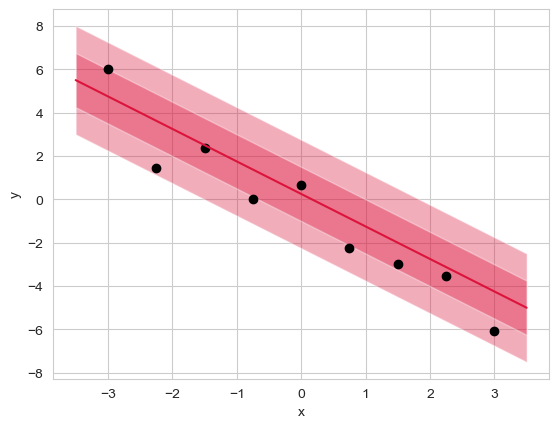

In [38]:
fig, ax = plt.subplots()

# true Trend
ax.plot( df_viz.x, df_viz.trend, color='crimson', linewidth=1.5 )
# TRUE variation around the TREND - showing 2 intervals
# 2 sigma interval
ax.fill_between( df_viz.x, df_viz.obs_lwr_95, df_viz.obs_upr_95, facecolor='crimson', alpha=0.35 )
# 1 sigma interval
ax.fill_between (df_viz.x, df_viz.obs_lwr_68, df_viz.obs_upr_68, facecolor='crimson', alpha=0.35)

# include the randomly generated small data set as a scatter plot
ax.scatter( df.x, df.y, color='k' )

# set labels
ax.set_xlabel('x')
ax.set_ylabel('y')
# show the plot
plt.show()

#### Observations
- 4/9 are located in the 68\% confidence interval, with 6 either in or close to (inner ribbon)
- 5/9 are located in the 95\% confidence interval, with 9/9 in this interval as it is the entire ribbon (outter and inner ribbon)

Let's save this small data set so we can ultimately FIT models to it. 

But, for bookkeeping purposes let's store the TRUE coefficients and SIGMA that generated data.

In [41]:
### Apply constant values for the parameters of the linear model
df['true_intercept'] = my_intercept
df['true_slope'] = my_slope
df['true_sigma'] = my_sigma

In [42]:
df

,x,trend,y,true_intercept,true_slope,true_sigma
0,-3.00,4.750,6.030315,0.25,-1.5,1.25
1,-2.25,3.625,1.457911,0.25,-1.5,1.25
2,-1.50,2.500,2.388383,0.25,-1.5,1.25
3,-0.75,1.375,0.007815,0.25,-1.5,1.25
4,0.00,0.250,0.651244,0.25,-1.5,1.25
5,0.75,-0.875,-2.254007,0.25,-1.5,1.25
6,1.50,-2.000,-2.969992,0.25,-1.5,1.25
7,2.25,-3.125,-3.537097,0.25,-1.5,1.25
8,3.00,-4.250,-6.063282,0.25,-1.5,1.25


Save the data frame to a CSV file

In [43]:
df.to_csv('week_10_linear_data.csv', index=False)

Let's read back the data to confirm that it was saved correctly

In [44]:
pd.read_csv('week_10_linear_data.csv')

,x,trend,y,true_intercept,true_slope,true_sigma
0,-3.00,4.750,6.030315,0.25,-1.5,1.25
1,-2.25,3.625,1.457911,0.25,-1.5,1.25
2,-1.50,2.500,2.388383,0.25,-1.5,1.25
3,-0.75,1.375,0.007815,0.25,-1.5,1.25
4,0.00,0.250,0.651244,0.25,-1.5,1.25
5,0.75,-0.875,-2.254007,0.25,-1.5,1.25
6,1.50,-2.000,-2.969992,0.25,-1.5,1.25
7,2.25,-3.125,-3.537097,0.25,-1.5,1.25
8,3.00,-4.250,-6.063282,0.25,-1.5,1.25
